In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [3]:
df = pd.read_csv('../content/gdrive/My Drive/index.csv')

In [69]:
#drop any empty rows
df.dropna(subset = ['coffee_name'], inplace = True)

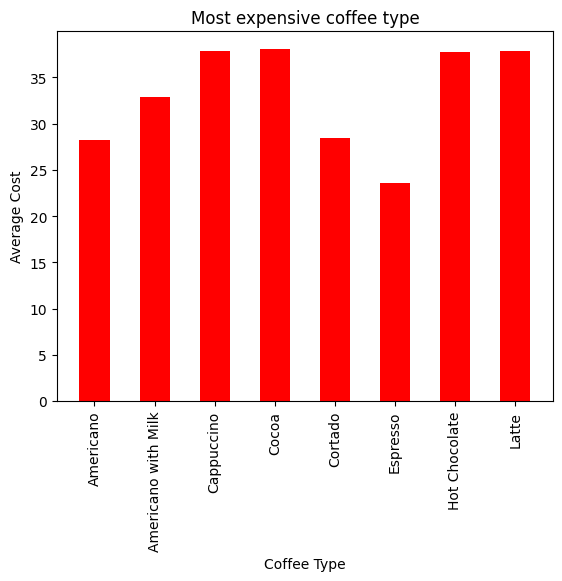

In [72]:
#Average cost for each coffee
dfm = df.groupby('coffee_name')[['money']].mean()
dfm = dfm.reset_index()

x = dfm['coffee_name']
y = dfm['money']

plt.title('Most expensive coffee type')
plt.xlabel('Coffee Type')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)

plt.bar(x, y, align ="center", color = "r", width = 0.5)
plt.show()

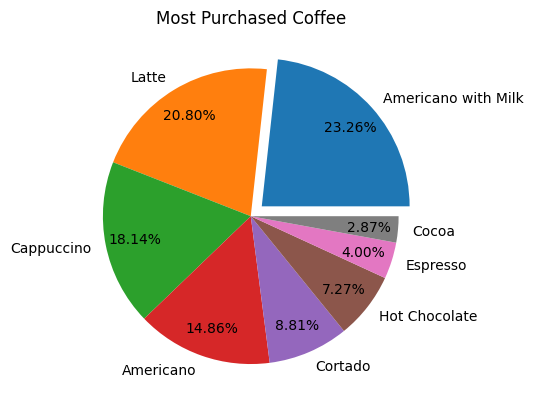

In [7]:
#Coffees purchased of each kind
dfc = df['coffee_name'].value_counts().to_frame()
dfc = dfc.reset_index()
dfc

langs = dfc['coffee_name']
votes = dfc['count']
explodes = []

#pop out the most purchased one
vmax = max(votes)
for i in votes:
  if i != vmax:
    explodes.append(0)
  else:
    explodes.append(0.1)

plt.title('Most Purchased Coffee')

plt.pie(votes, labels = langs, autopct= "%.2f%%", pctdistance= 0.8, explode = explodes)
plt.show()

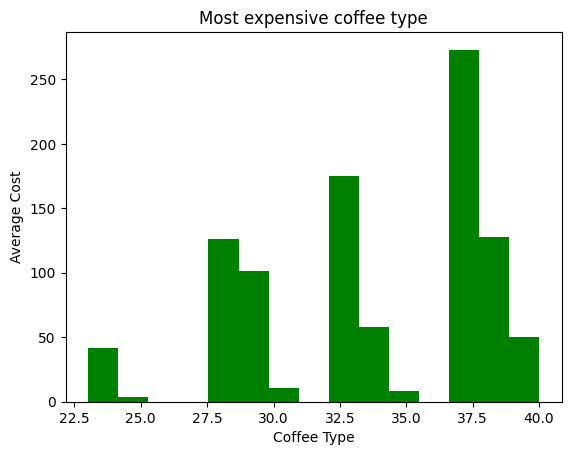

In [11]:
#coffee price histogram
pr = df['money']

plt.title('Most expensive coffee type')
plt.xlabel('Coffee Type')
plt.ylabel('Average Cost')
plt.hist(pr, bins = 15, color = 'green')
plt.show()

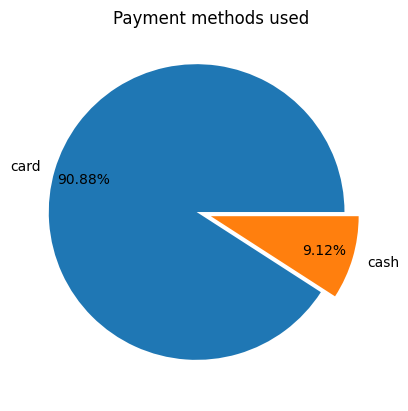

In [20]:
#Most common payment method
dft = df['cash_type'].value_counts().to_frame()
dft = dft.reset_index()

votes = dft['count']
vmax = max(votes)
explodes = []
for i in votes:
  if i != vmax:
    explodes.append(0)
  else:
    explodes.append(0.1)

plt.title('Payment methods used')
plt.pie(votes, labels = dft['cash_type'], autopct= "%.2f%%", pctdistance= 0.8, explode = explodes)
plt.show()

In [34]:
#extract the month from datatime of each purchase
df['month'] = pd.DatetimeIndex(df['datetime']).month

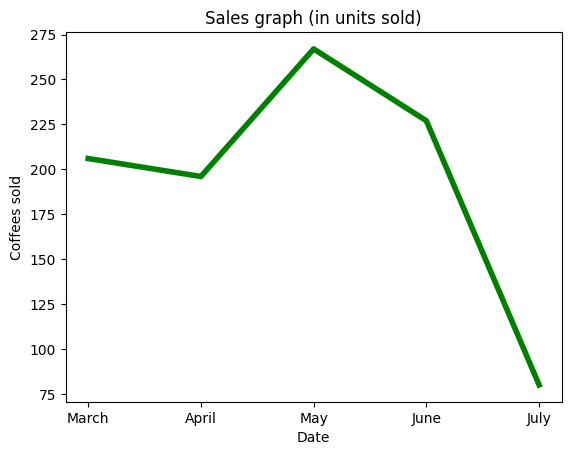

In [65]:
#units sold per month
m = df['month'].value_counts().to_frame()
m = m.reset_index()
m = m.sort_values(by = 'month')

months = []
for item in m['month']:
  months.append(calendar.month_name[item])
plt.xlabel('Date')
plt.ylabel('Coffees sold')
plt.title('Sales graph (in units sold)')
plt.plot(months, m['count'], 'green',lw = 4)
plt.show()

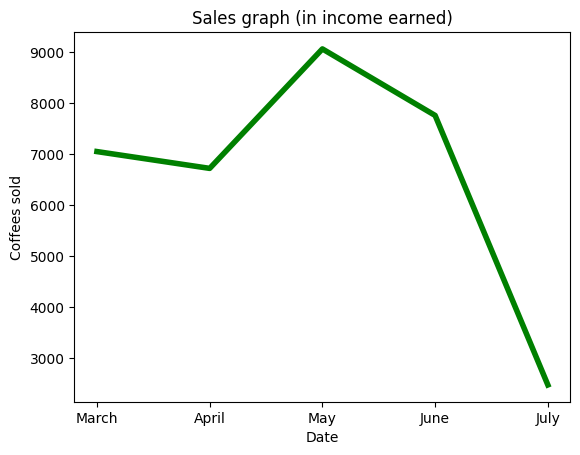

In [66]:
#total income per month
inc = df.groupby('month')[['money']].sum()
inc = inc.reset_index()
inc

months = []
for item in inc['month']:
  months.append(calendar.month_name[item])

plt.xlabel('Date')
plt.ylabel('Coffees sold')
plt.title('Sales graph (in income earned)')
plt.plot(months, inc['money'], 'green',lw = 4)
plt.show()